# MOWNIT - Laboratorium 9 by Jakub Stępień

## Wybrane zagadnienia z algebry liniowej, faktoryzacja

### Zastosowanie faktoryzacji SVD

### Czym jest Singular Value Decomposition (SVD)?

SVD to inaczej rozkład na wartości osobliwe - oznacza to pewien rozkład macierzy (dekompozycję) na iloczyn trzech specyficznych macierzy.

Niech $\text{X}$ będzie oznaczało naszą macierz.

Każdą macierz rzeczywistą $\text{X}$ możemy przedstawić w postaci: $$\text{X} = \text{U}\Sigma\text{V}^T$$ gdzie:

$U, V$ - macierze ortogonalne ($U^{-1} = U^T$, analogicznie $V$)

$\Sigma$ - macierz diagonalna, taka, że $\Sigma = diag(\sigma_i)$, gdzie:

$\sigma_i$ - nieujemne wartości osobliwe macierzy $X$, zwyczajowo uporządkowane nierosnąco.

**PRZYKŁAD:**

Ponownie zdefiniujmy naszą macierz $X$, tym razem nie będzie ona wypełniona wektorami kolumnowymi aż do $m$.

$$X = [x_1, x_2, ..., x_m]$$

Dla celów naszego przykładu załóżmy, że zrobiliśmy zdjęcia twarzy różnych ludzi, każde po 1 megapixel i przekształciliśmy je do postaci naszych wektorów 1 x 1 000 000.

Załóżmy też, że $x_k \in R^n$ gdzie n oznacza długość wektora $x_i$.

Tym samym określiliśmy m wektorów długości 1 x 1 000 000.

Używając SVD na macierzy $X$ otrzymamy następujący iloczyn macierzy:

$$X = [x_1, x_2, ..., x_m] = U\Sigma V^T$$

Powołując się definicje powyższych macierzy wyrażenie możemy przedstawić jako:

$$X = U\Sigma V^T = [u_1, u_2, ..., u_n]
  \begin{bmatrix}
    \sigma_1 &  \\
    & \sigma_2 & \\
    & &  \ddots &  \\
    & & &\sigma_m \\
    0 & 0 & 0 & 0  & 0
  \end{bmatrix}[v_1, v_2, ..., v_m]^T
$$
gdzie:

$u_i, v_i$ - wektory kolumnowe

Każda z tych macierzy ma pewne charakterystyczne własności:

Kolumny $u_i$ mają taki sam rozmiar jak kolumny $x_i$. W kontekście do zdjęć twarzy są możemy je uznać za wektory własne$^{[1]}$ tych twarzy, które są uporządkowane hierarchicznie.

Dlatego $u_1$ jest ważniejsze od $u_2$, $u_2$ od $u_3$ itd.. jeżeli chodzi o ich zdolność do opisania wariancji (jednostki zmienności) kolumn macierzy $X$.

Tutaj warto wspomnieć o następujących własnościach:`

$U, V$ - to macierze unitarne zatem:

$$UU^T = U^T U = I_{nxn}$$

$$VV^T = V^T V = I_{mxm}$$

$$\Sigma - diagonal$$

Powyższy zapis przekłada się na to, że kolumny $u$ są ortonormalne - czyli wszystkie są ortogonalne i mają długość jednostkową. Zapewnia to nam kompletną bazę dla wszystkich naszych $n$ w podprzestrzeni $n$-wymiarowej co daje nam $I_{nxn}$.

Analogicznie podchodzimy do macierzy V, tylko tutaj otrzymujemy $I_{mxm}$.

$\Sigma$ jest macierzą diagonalną uporządkowaną hierarchicznie nierosnących wartościach, zatem:

$$\sigma_1 \geqslant  \sigma_2 \geqslant  ... \sigma_m \geqslant  0$$

To wszystko oznacza, że $u_1$ odpowiadająca $\sigma_1$ i $v_1$ są w pewien sposób bardziej istotne niż $u_2, \sigma_2, v_2$ itd.. jeżeli chodzi o opisywanie informacji zawartych w macierzy $X$. Zatem względne znaczenie kolumn $u_i$ oraz $v_i$ są zależne od wartości $\sigma_i$ w macierzy $\Sigma$.

Dlatego też można określić te macierze jako:
- $U$ - left singular vectors
- $\Sigma$ - singular values matrix
- $V$ - right singular vectors

SVD umożliwia nam w przypadku bardzo małych wartości $\sigma_i$ odrzucenie ich i aproksymację macierzy $X$ tylko w oparciu o kilka najbardziej istotnych kolumn $U, V$ oraz wartości z $\Sigma$.

Wektory $u_1, u_2, u_m$ umożliwiają nam odtworzenie zdjęć twarzy.

Z kolei macierz $V$ mówi nam jak mamy dodawać do siebie wektory $u_i$:

$$[v_1, v_2, ..., v_m]^T$$

$$V^T = \begin{bmatrix}
v_1\\
v_2 \\
\dots
\end{bmatrix}$$

Pierwsza kolumna macierzy transponowanej $V$ zawiera zbiór wskazujący wszystkie wektory własne z $U$, które trzeba dodać do siebie żeby otrzymać $x_1$. Analogicznie druga kolumna $V^T$ daje nam przepis na otrzymanie $x_2$, itd.. Wszystko to przeskalowane przez odpowiednie $\sigma_i$.

W rezultacie jesteśmy w stanie odtworzyć zdjęcia z przykładu używając dużo mniejszej liczby wartości niż posiada oryginalne zdjęcie.

$[1]$ "Eigen" faces - w tym rozumieniu wektory własne czyli wielkość opisującą endomorfizm (przekształcenie liniowe) danej przestrzeni liniowej.

### Gdzie możemy znaleźć zastosowania dla SVD?

Najlepszym skojarzeniem gdy mówimy o SVD wydaje się jego zastosowania w dziedzinie redukcji danych.

Mówiąc redukcja od razu przychodzą nam do głowy zdjęcia ważące po kilkanaście/kilkadziesiąt megabajtów czy filmy w wysokiej rozdzielczości. Tutaj oczywiście SVD również dobrze się odnajduje, jednakże w ostatnich latach znalazł on sobie także miejsce w Machine Learning'u. Tutaj dobrym przykładem będzie Principal Component Analysis (PCA). PCA nam spojrzenie na duży zbiór danych i spojrzenie na niego przez pryzmat dominujących wzorców i korelacji między nimi.

SVD na najbardziej podstawowym poziomie umożliwia nam rozwiązywanie układów równań zapisanych w formie macierzowej $Ax=b$ dla macierzy niekwadratowych. Co ma swoje zastosowanie w budowaniu modeli opartych na regresji liniowej, jak i wielu innych podejściach.

### Przykład zastosowania - kompresja obrazu

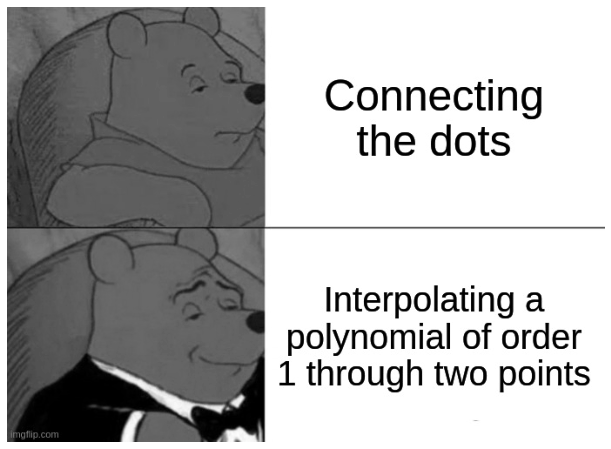

In [15]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

# Image in color can be represented as n x m x 3 matrix.
# So we need to reduce it to n x m - basically grayscale it.

# A = imread(os.path.join('.', 'cat.gif'))
A = imread(os.path.join('.', 'pooh.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

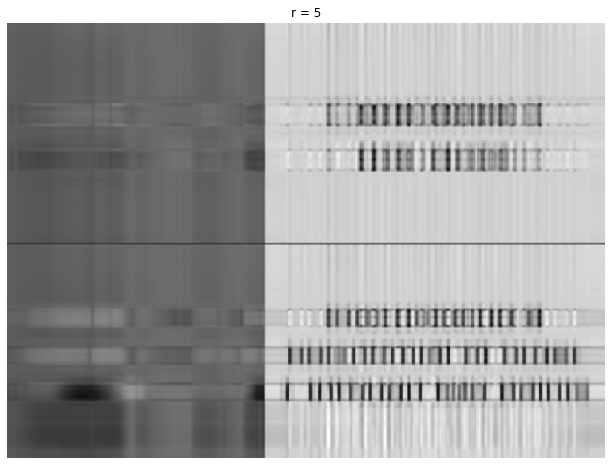

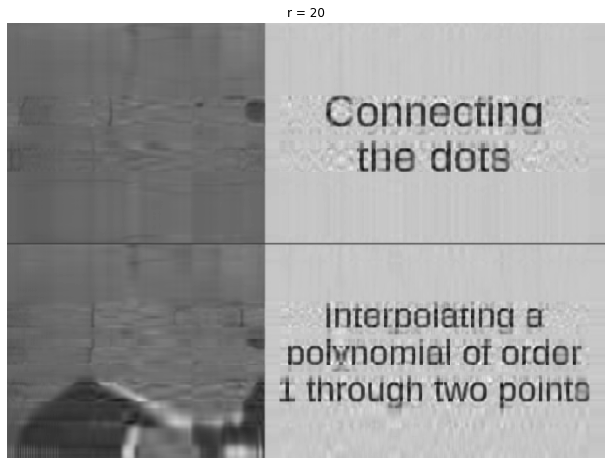

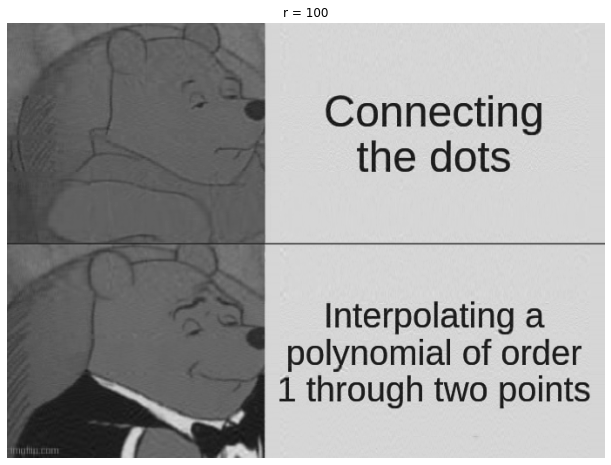

In [16]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

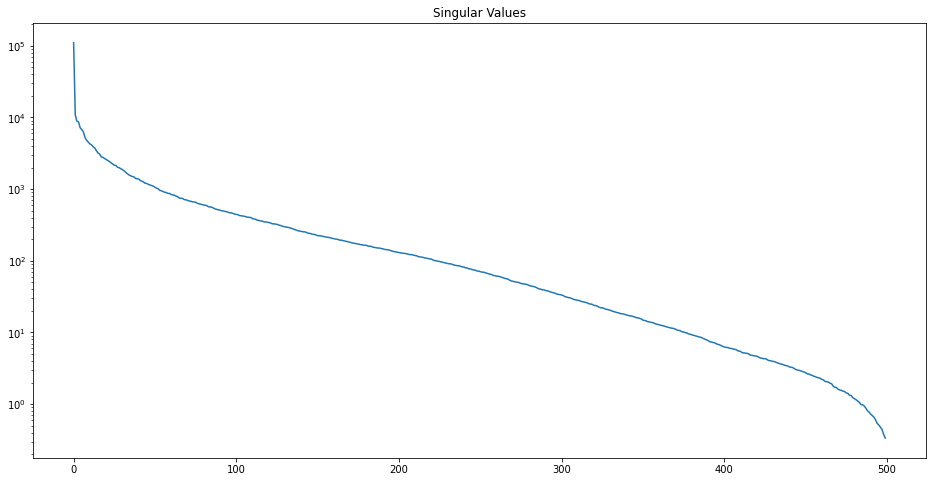

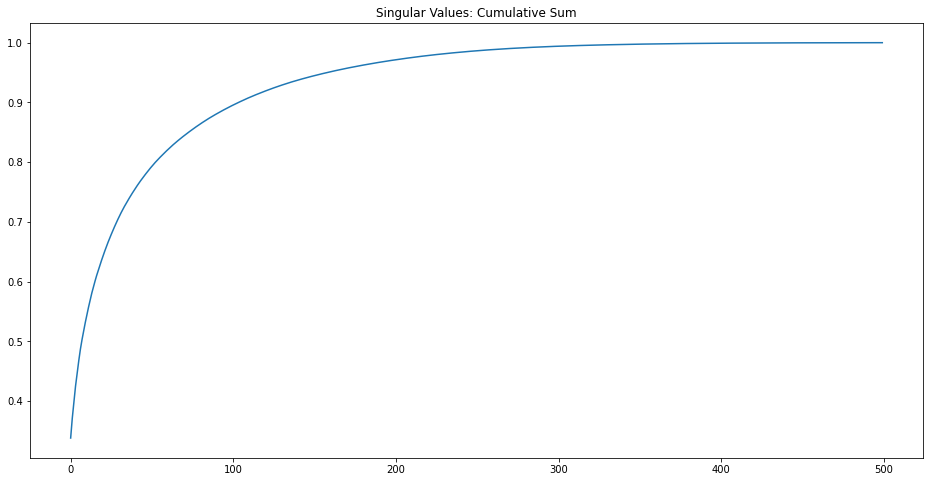

In [17]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

#### Sources:

1. "Data-driven science and engineering" Steven L. Brunton, J. Nathan Kutz
2. https://en.wikipedia.org/wiki/Singular_value_decomposition